Test notebook

In [1]:
# Dependencies and Setup
import missingno as msno

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import sys
import json
import requests

DNPAO_df = pd.read_csv('DNPAO_all.csv')
DNPAO_df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


<Axes: >

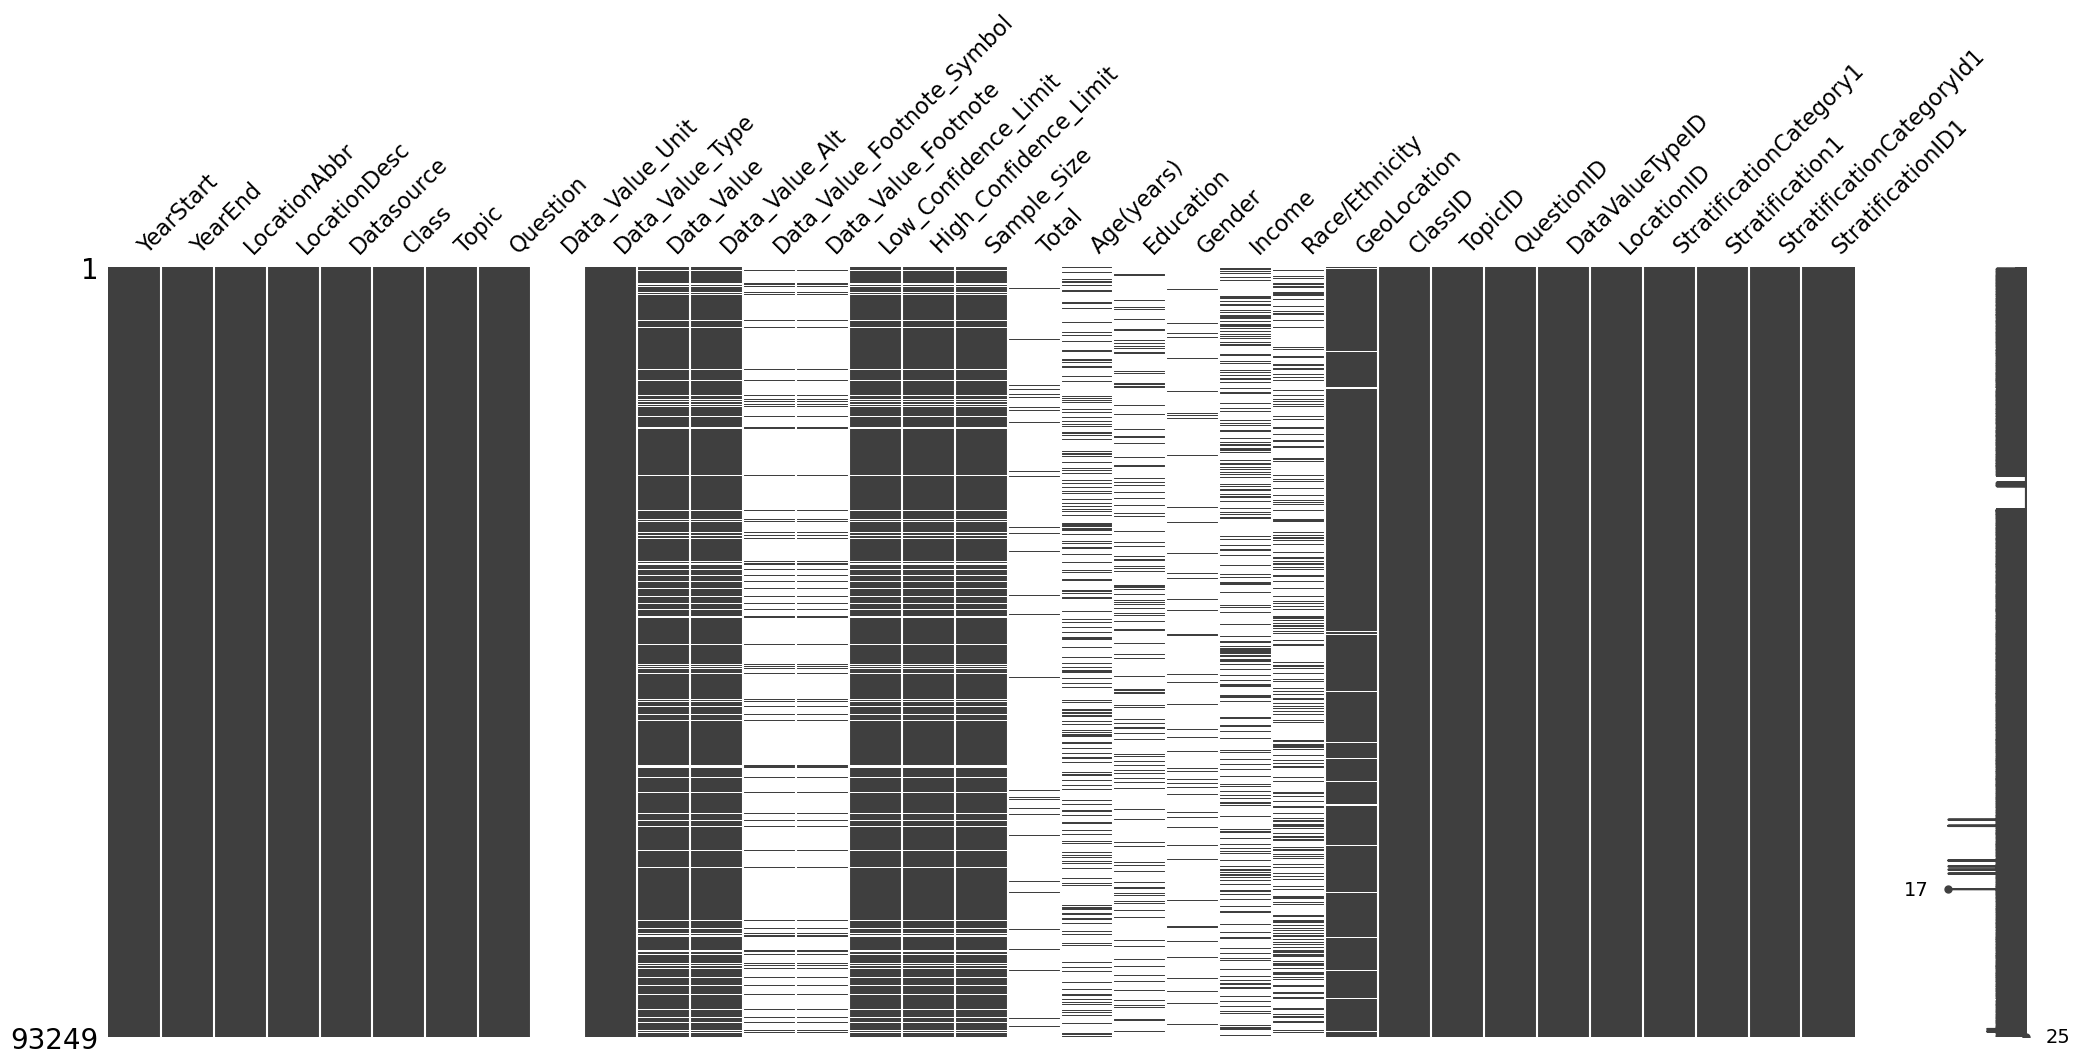

In [2]:
%matplotlib inline
msno.matrix(DNPAO_df)

# Import DNPAO_df.csv to database (SQLpostgres) for extracting the desired data, i.e., Q037/Q036 for year 2022 for Visualization

# VISUALIZATION FOR QUESTION 36

In [3]:
# Dependencies and Setup
import missingno as msno
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import sys
import json
import requests

# Load the data file, read and display it with Pandas
q036_data = Path("Q036.csv")

# Read and store into Pandas DataFrames
q036_df = pd.read_csv(q036_data)
q036_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Age (years),35 - 44,AGEYR,AGEYR3544


In [4]:
q036_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
# Trim the columns of data to the one we need
q036_9cols = q036_df.drop(['YearEnd','Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'DataValueTypeID', 'LocationID'], axis=1)
# q036sevencols.to_csv("q036sevencols.csv", index=False)
q036_9cols

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,35.2,Q036,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,US,National,35.4,Q036,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,RI,Rhode Island,32.1,Q036,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,US,National,32.3,Q036,Income,"Less than $15,000",INC,INCLESS15
4,2011,US,National,29.9,Q036,Age (years),35 - 44,AGEYR,AGEYR3544
...,...,...,...,...,...,...,...,...,...
18112,2022,WY,Wyoming,35.7,Q036,Education,High school graduate,EDU,EDUHSGRAD
18113,2022,WY,Wyoming,32.8,Q036,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18114,2022,WY,Wyoming,NaN,Q036,Race/Ethnicity,Asian,RACE,RACEASN
18115,2022,WY,Wyoming,35.2,Q036,Age (years),35 - 44,AGEYR,AGEYR3544


In [6]:
#remove NA Data value
q036_9cols_cleaned = q036_9cols.dropna(subset=['Data_Value'])
q036_9cols_cleaned

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,35.2,Q036,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,US,National,35.4,Q036,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,RI,Rhode Island,32.1,Q036,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,US,National,32.3,Q036,Income,"Less than $15,000",INC,INCLESS15
4,2011,US,National,29.9,Q036,Age (years),35 - 44,AGEYR,AGEYR3544
...,...,...,...,...,...,...,...,...,...
18111,2022,WY,Wyoming,39.0,Q036,Age (years),25 - 34,AGEYR,AGEYR2534
18112,2022,WY,Wyoming,35.7,Q036,Education,High school graduate,EDU,EDUHSGRAD
18113,2022,WY,Wyoming,32.8,Q036,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18115,2022,WY,Wyoming,35.2,Q036,Age (years),35 - 44,AGEYR,AGEYR3544


In [7]:
q036_9cols_sorted = q036_9cols_cleaned.sort_values(by=['YearStart', 'StratificationCategory1', 'Stratification1', 'LocationDesc'])
q036_9cols_sorted

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1410,2011,AL,Alabama,16.3,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
1313,2011,AK,Alaska,19.8,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
53,2011,AZ,Arizona,18.7,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
775,2011,AR,Arkansas,23.0,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
1034,2011,CA,California,14.5,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...
16589,2022,VA,Virginia,35.2,Q036,Total,Total,OVR,OVERALL
18032,2022,WA,Washington,31.7,Q036,Total,Total,OVR,OVERALL
18069,2022,WV,West Virginia,41.0,Q036,Total,Total,OVR,OVERALL
18039,2022,WI,Wisconsin,37.7,Q036,Total,Total,OVR,OVERALL


# Visualizations focus on a specific year, i.e., 2022

In [8]:
q036_2022 = q036_9cols_sorted.loc[q036_9cols_sorted["YearStart"] == 2022]
q036_2022

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
16607,2022,AL,Alabama,19.8,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
16654,2022,AK,Alaska,24.5,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
16737,2022,AZ,Arizona,23.3,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
16710,2022,AR,Arkansas,27.6,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
16770,2022,CA,California,13.8,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...
16589,2022,VA,Virginia,35.2,Q036,Total,Total,OVR,OVERALL
18032,2022,WA,Washington,31.7,Q036,Total,Total,OVR,OVERALL
18069,2022,WV,West Virginia,41.0,Q036,Total,Total,OVR,OVERALL
18039,2022,WI,Wisconsin,37.7,Q036,Total,Total,OVR,OVERALL


In [9]:
# Age
q036_2022_states_age = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "AGEYR"]
q036_2022_states_age.to_csv("q036_2022_states_age.csv", index=False)

/Users/hatkiet/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


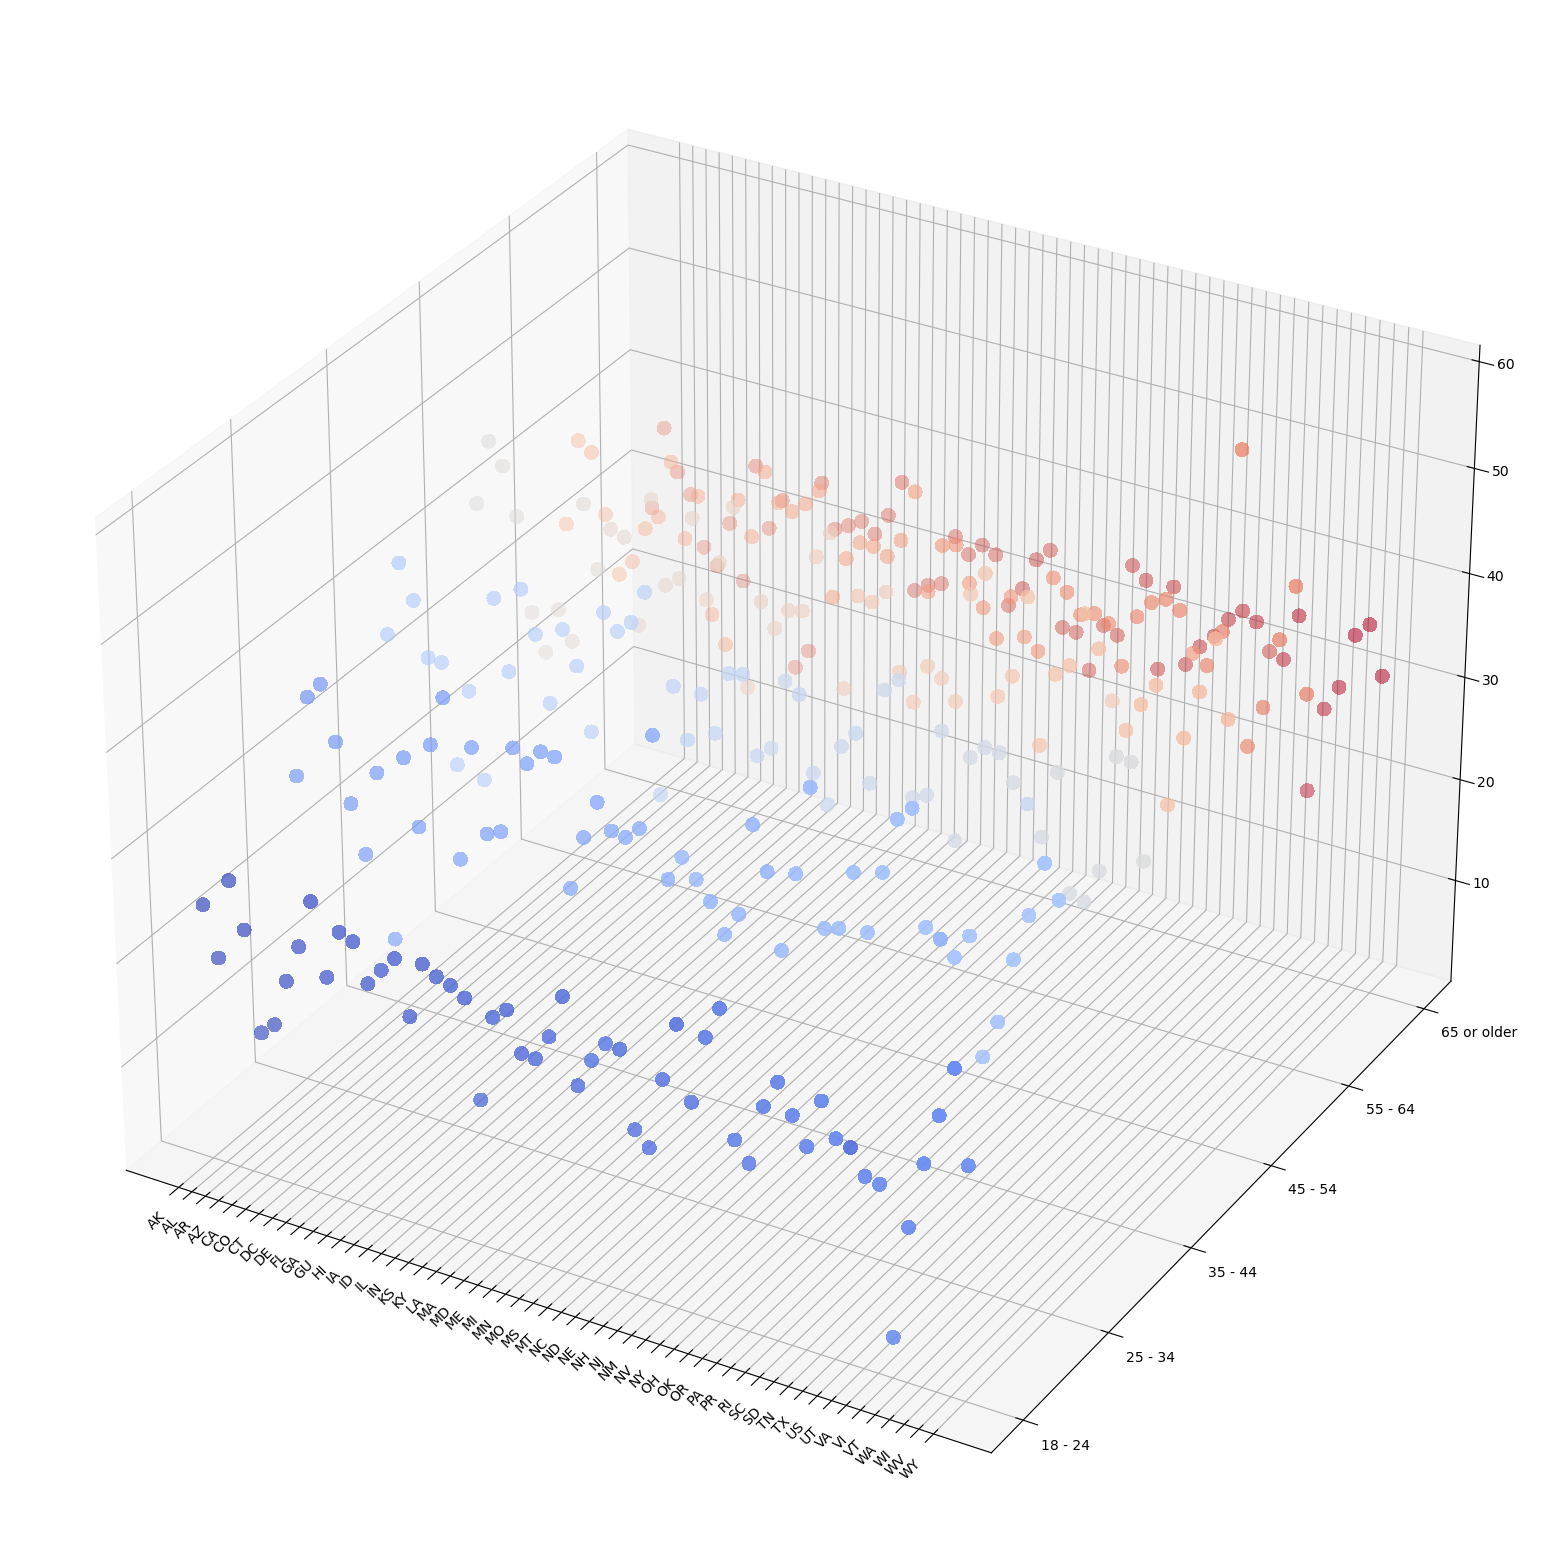

In [10]:
#3d Plot by HLee
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

age = np.unique(np.array(q036_2022_states_age['Stratification1']))
state = np.unique(np.array(q036_2022_states_age['LocationAbbr']))

XUniques, Xt = np.unique(q036_2022_states_age['LocationAbbr'], return_inverse=True)
YUniques, Yt = np.unique(q036_2022_states_age['Stratification1'], return_inverse=True)
Zt = q036_2022_states_age['Data_Value']

#figsize large due to state abbr, need another solution for prettiness, works for now, contrained isnt being applied
fig=plt.figure(figsize=(20,20),layout='constrained')
ax= fig.add_subplot(projection='3d')
#color function needs fix
ax.scatter(Xt, Yt, Zt, c=np.arange((len(state)*6)), cmap=cm.coolwarm, s=100,linewidth=0, antialiased=False)

ax.set_xticks(range(len(state)), labels=state, ha='right',rotation=45)
ax.set_yticks(range(len(age)), labels=age, ha='left')
plt.show()

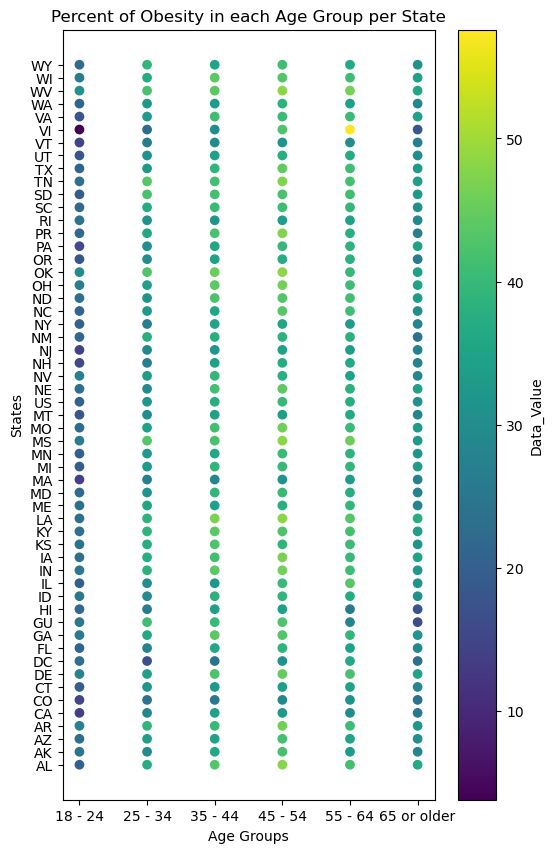

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))

# Create a scatter plot
plt.scatter(q036_2022_states_age["Stratification1"], q036_2022_states_age["LocationAbbr"], c=q036_2022_states_age["Data_Value"], cmap='viridis')

# Set labels and title
plt.xlabel('Age Groups')
plt.ylabel('States')
plt.title('Percent of Obesity in each Age Group per State')

# Add colorbar
plt.colorbar(label='Data_Value')

# Show the plot
plt.show()

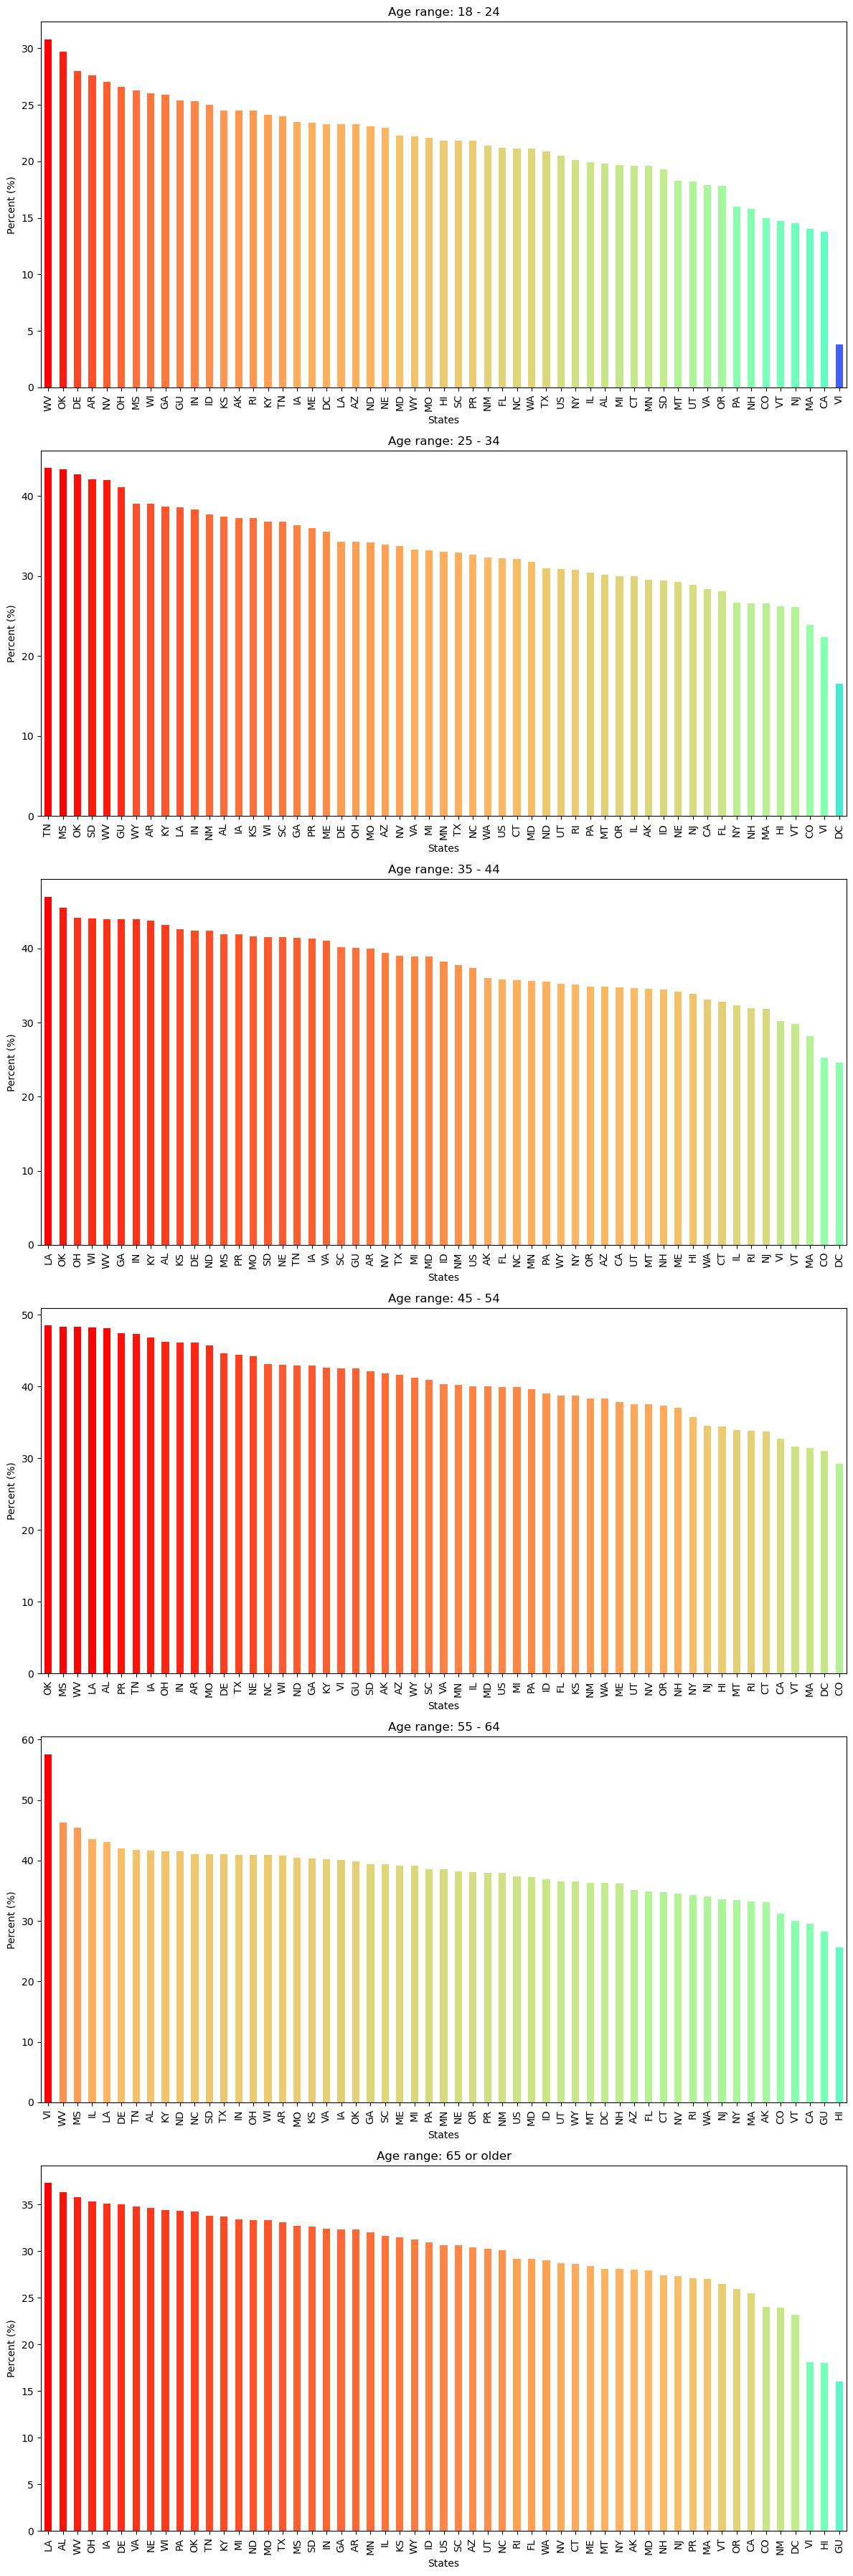

In [12]:
# Get unique values of age range
age_ranges = q036_2022_states_age["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(age_ranges)
num_cols = 1  # Each age range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique age range
for i, age in enumerate(age_ranges):
    # Filter the DataFrame for the current age range
    filtered_data = q036_2022_states_age[q036_2022_states_age["Stratification1"] == age]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current age range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    colors = plt.cm.rainbow(grouped_data.values / max(grouped_data.values))  # Use rainbow colormap
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Age range: {age}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

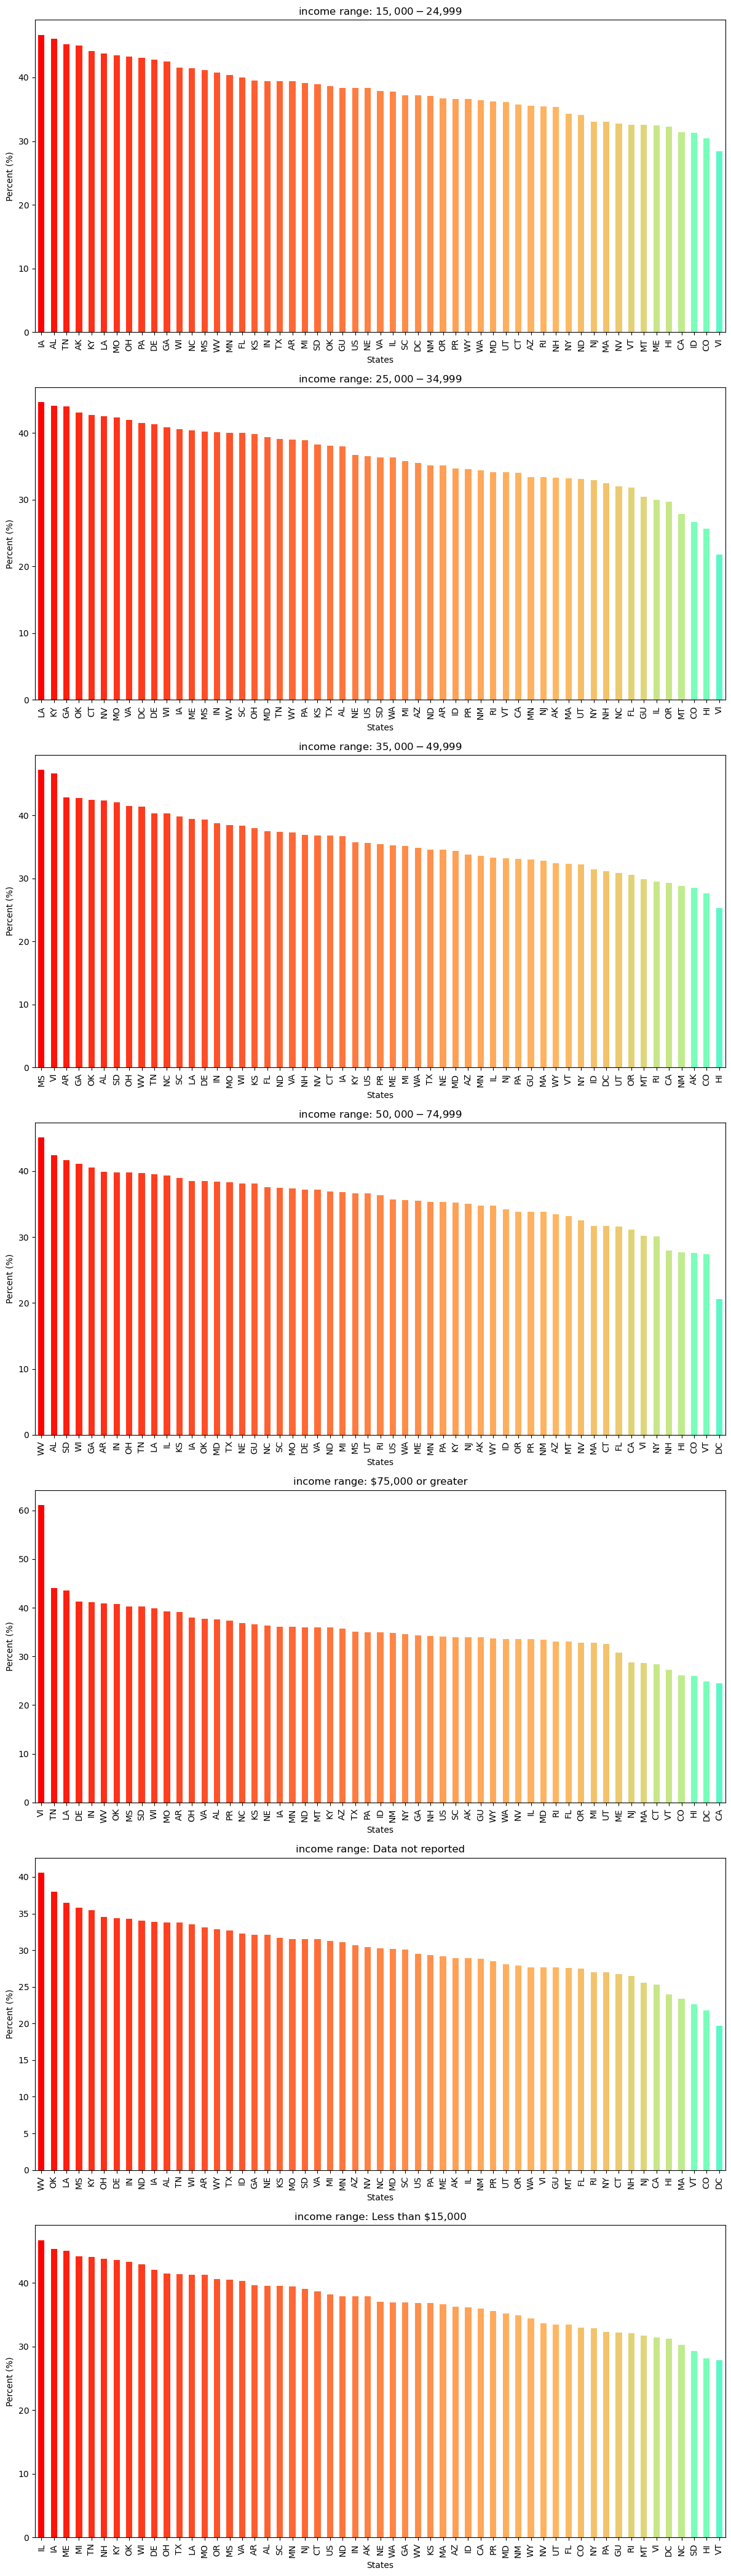

In [13]:
# Output 
q036_2022_states_income = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "INC"]
q036_2022_states_income.to_csv("q036_2022_states_income.csv", index=False)

# Get unique values of income range
income_ranges = q036_2022_states_income["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(income_ranges)
num_cols = 1  # Each income range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique income range
for i, income in enumerate(income_ranges):
    # Filter the DataFrame for the current income range
    filtered_data = q036_2022_states_income[q036_2022_states_income["Stratification1"] == income]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current income range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'income range: {income}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

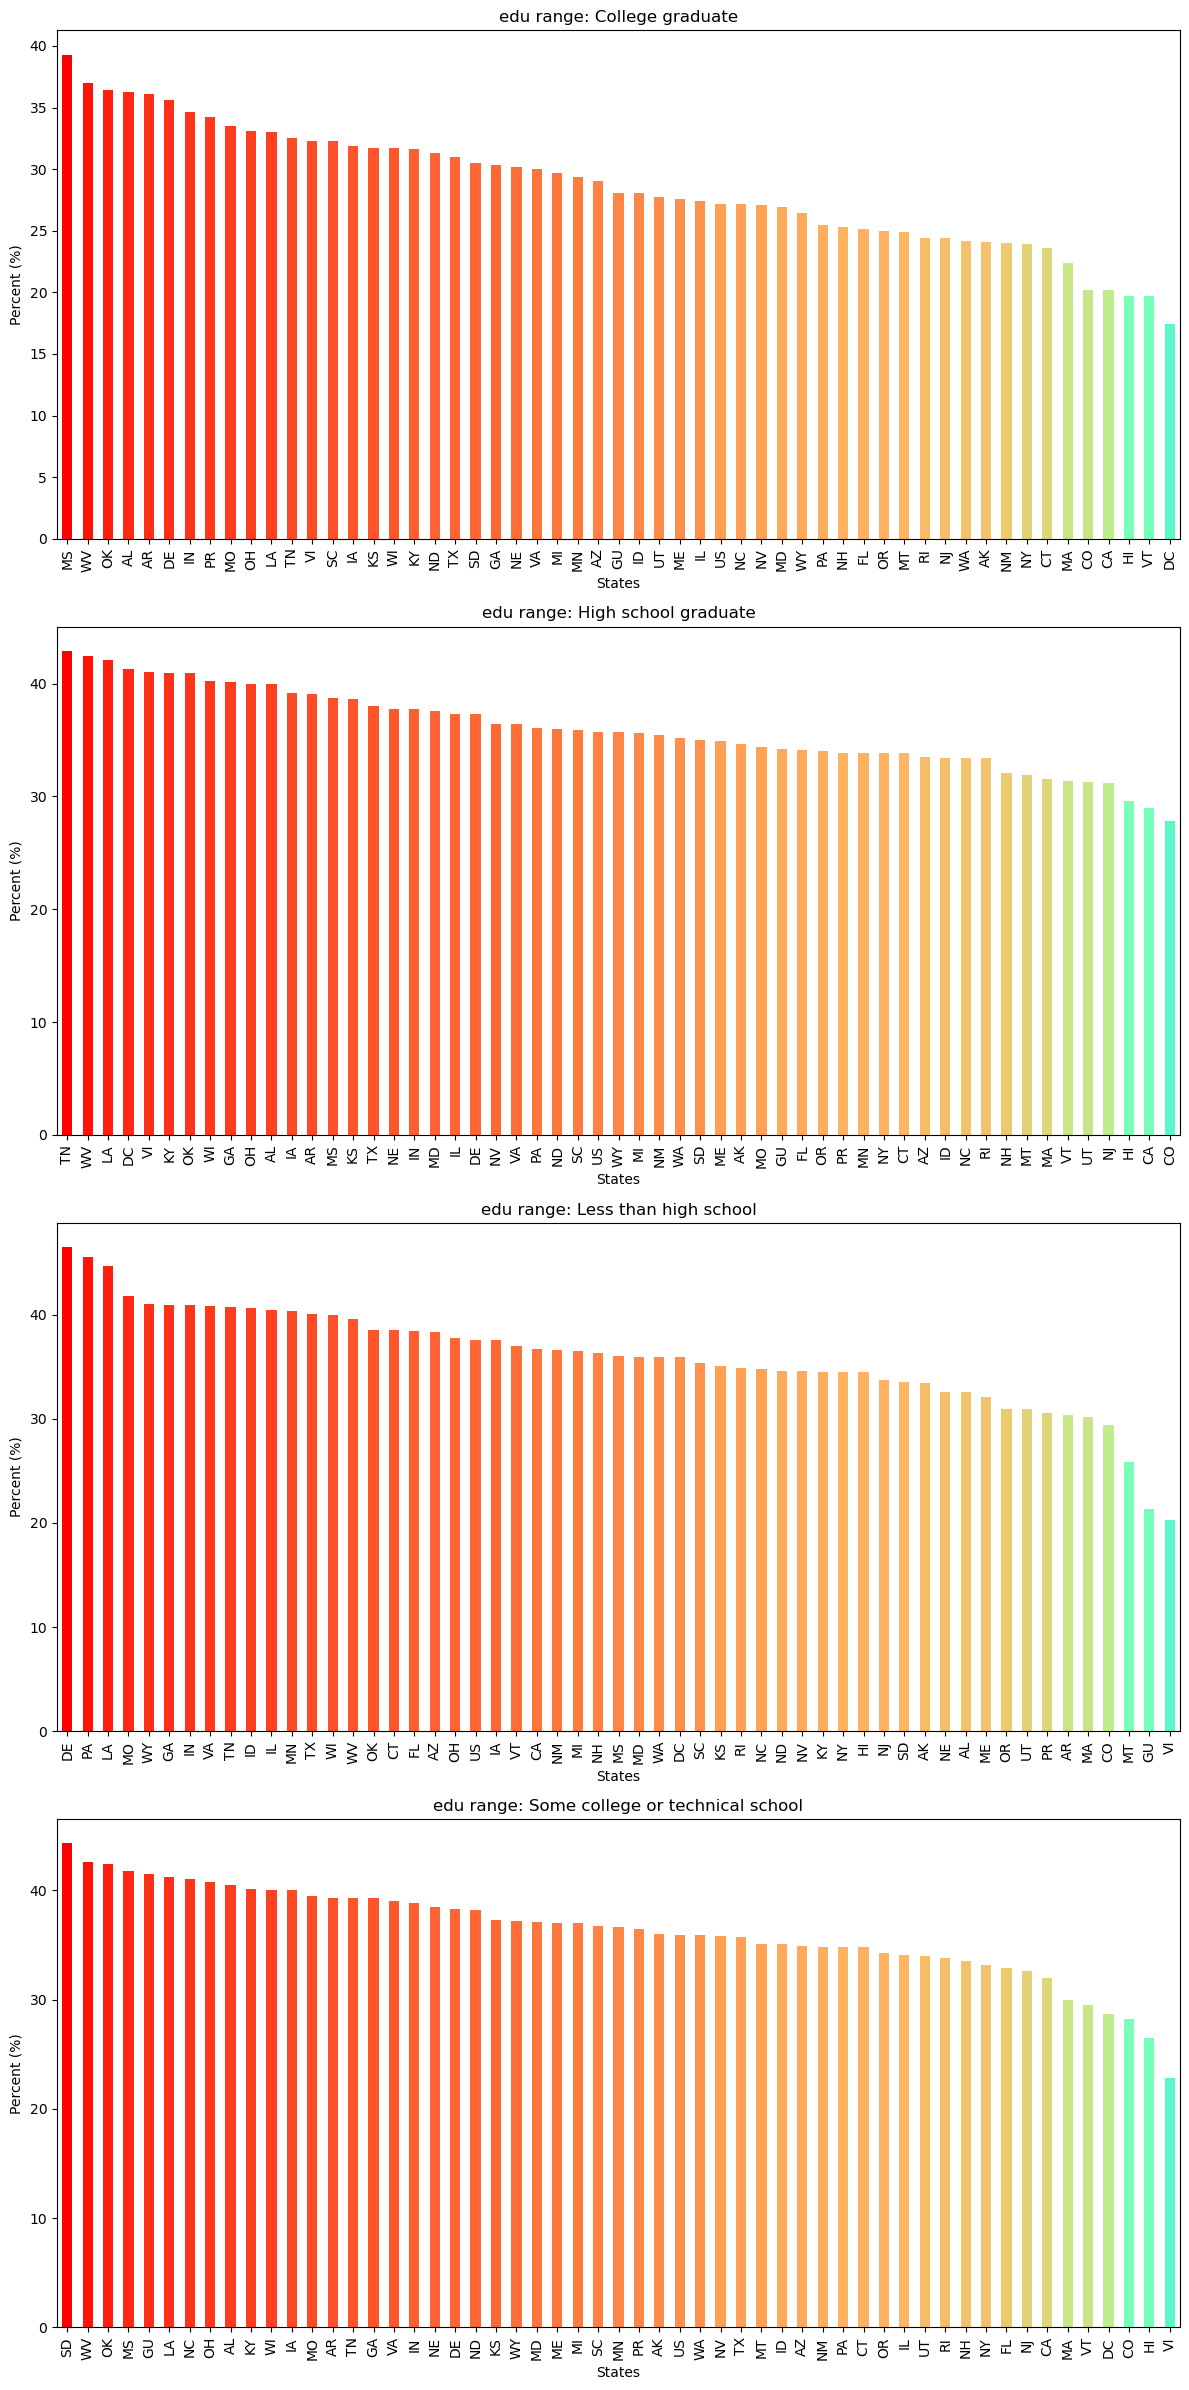

In [14]:
# Education
q036_2022_states_edu = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "EDU"]
q036_2022_states_edu.to_csv("q036_2022_states_edu.csv", index=False)

# Get unique values of edu range
edu_ranges = q036_2022_states_edu["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(edu_ranges)
num_cols = 1  # Each edu range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique edu range
for i, edu in enumerate(edu_ranges):
    # Filter the DataFrame for the current edu range
    filtered_data = q036_2022_states_edu[q036_2022_states_edu["Stratification1"] == edu]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current edu range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'edu range: {edu}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

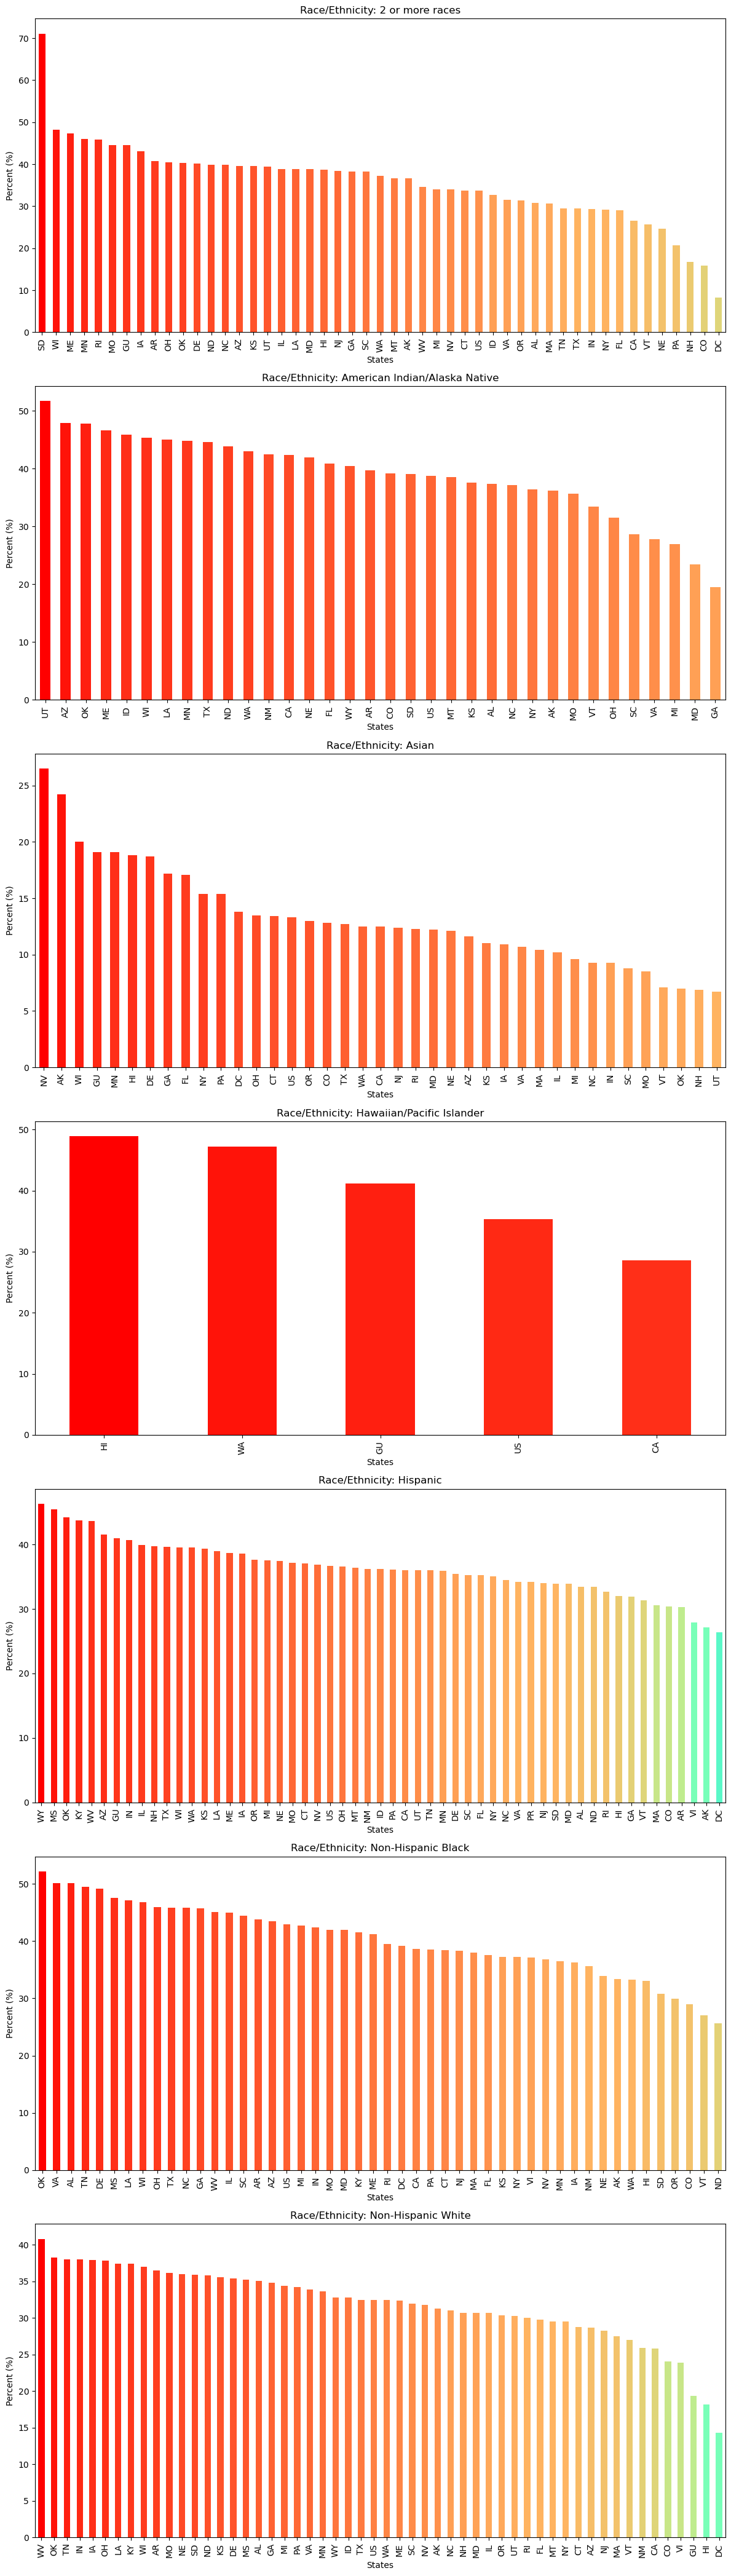

In [15]:
# Race
q036_2022_states_race = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "RACE"]
q036_2022_states_race.to_csv("q036_2022_states_race.csv", index=False)

# Get unique values of race range
races = q036_2022_states_race["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(races)
num_cols = 1  # Each race will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique race range
for i, race in enumerate(races):
    # Filter the DataFrame for the current race 
    filtered_data = q036_2022_states_race[q036_2022_states_race["Stratification1"] == race]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current race range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Race/Ethnicity: {race}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

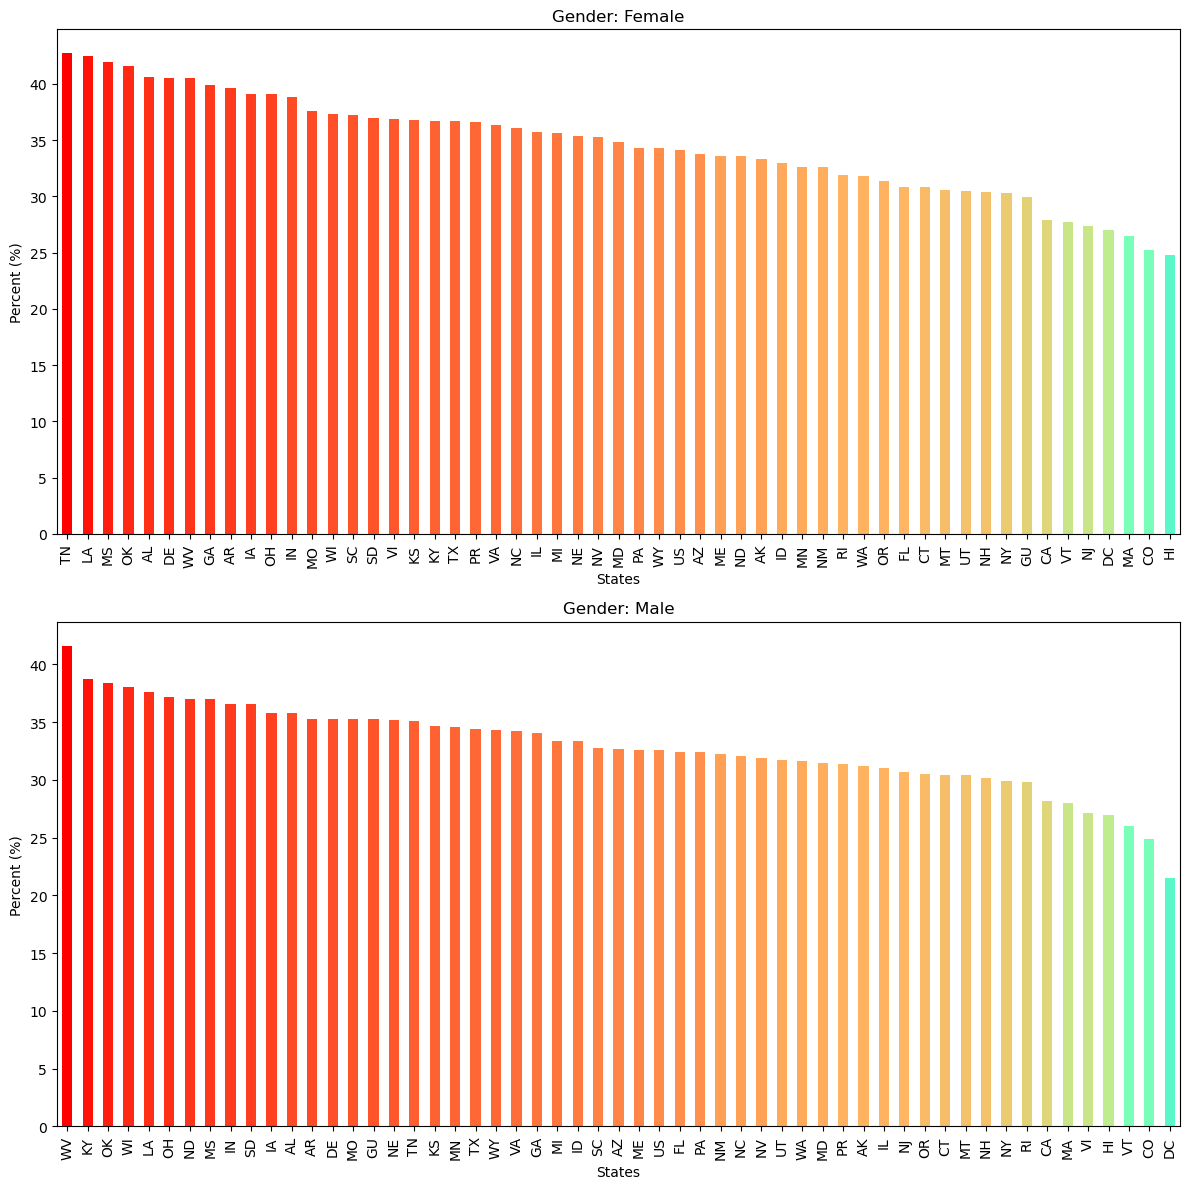

In [16]:
# Genders
q036_2022_states_gen = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "GEN"]
q036_2022_states_gen.to_csv("q036_2022_states_gen.csv", index=False)

# Get unique values of genders
genders = q036_2022_states_gen["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(genders)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, gen in enumerate(genders):
    # Filter the DataFrame for the current gen 
    filtered_data = q036_2022_states_gen[q036_2022_states_gen["Stratification1"] == gen]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Gender: {gen}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# NATIONAL

In [17]:
#filter only National data
q036_natl_df = q036_9cols_sorted[q036_9cols_sorted['LocationDesc'].str.contains('National')].sort_values(by=['YearStart', 'Stratification1'])
q036_natl_df

,YearStart,LocationAbbr,LocationDesc,Data_Value,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
27,2011,US,National,31.3,Q036,Income,"$15,000 - $24,999",INC,INC1525
42,2011,US,National,29.5,Q036,Income,"$25,000 - $34,999",INC,INC2535
14,2011,US,National,28.7,Q036,Income,"$35,000 - $49,999",INC,INC3550
18,2011,US,National,28.4,Q036,Income,"$50,000 - $74,999",INC,INC5075
9,2011,US,National,22.8,Q036,Income,"$75,000 or greater",INC,INC75PLUS
...,...,...,...,...,...,...,...,...,...
17808,2022,US,National,32.6,Q036,Gender,Male,GEN,MALE
17906,2022,US,National,43.0,Q036,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
17904,2022,US,National,32.5,Q036,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
17907,2022,US,National,35.9,Q036,Education,Some college or technical school,EDU,EDUCOTEC


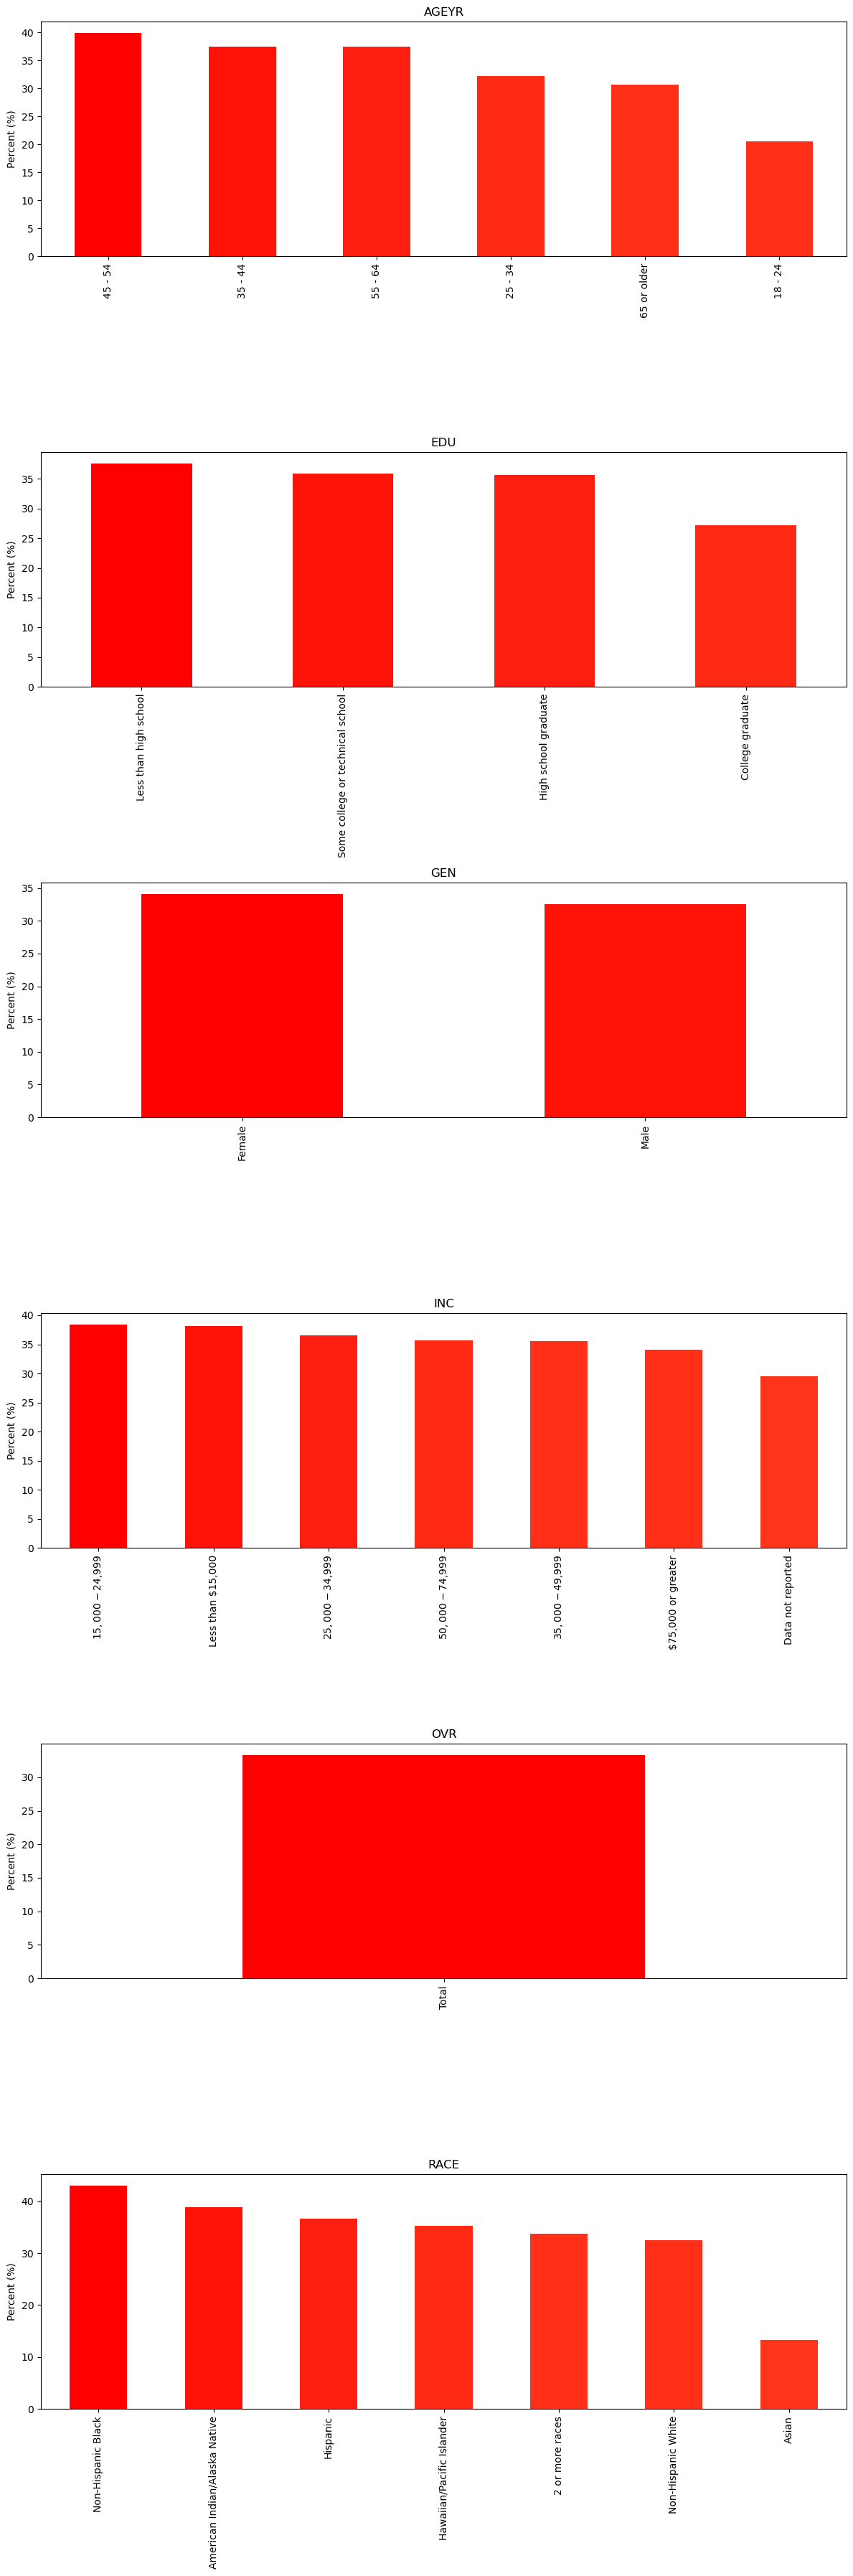

In [18]:
q036_natl_2022 = q036_natl_df.loc[q036_natl_df["YearStart"] == 2022].sort_values(by=['StratificationCategoryId1', 'Stratification1'])
q036_natl_2022.to_csv("q036_natl_2022.csv", index=False)

# Get unique values
strats = q036_natl_2022["StratificationCategoryId1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(strats)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, strat in enumerate(strats):
    # Filter the DataFrame for the current gen 
    filtered_data = q036_natl_2022[q036_natl_2022["StratificationCategoryId1"] == strat]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('Stratification1')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{strat}')
    ax.set_xlabel('')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# Next: VISUALIZATION WITH HTML AND JAVA SCRIPT